In [1]:
import pandas as pd

intern_data = pd.read_csv('updated_intern_data.csv')
stable_data = pd.read_csv('data2_stable.csv')

print(intern_data.head())
print(stable_data.head())


   Material  RCS (m^2)  Acoustic Reflection Coefficient  \
0    Osmium      0.002                             0.20   
1   Iridium      0.003                             0.25   
2  Platinum      0.004                             0.30   
3      Gold      0.005                             0.35   
4    Silver      0.006                             0.40   

   Thermal Signature (mW/m^2K) Density (kg/m?) Refractive Index  \
0                          120           22.59             2.25   
1                          110           22.65              2.2   
2                          100           21.45             2.14   
3                           90           19.32             2.42   
4                           80            10.5             2.35   

  Thermal Conductivity (W/m?K) Chemical_Symbol  
0                         31.3              Os  
1                           23              Ir  
2                           71              Pt  
3                          316              Au

In [59]:
stable_data.head(2)

,name,entry_id,calculation_id,icsd_id,formationenergy_id,duplicate_entry_id,composition,composition_generic,prototype,spacegroup,...,natoms,unit_cell,sites,band_gap,delta_e,stability,fit,calculation_label,stability_label,compound_list
0,Ga2Os,17252,21313,103785.0,4077096,17252,Ga2 Os1,AB2,TiSi2,Fddd,...,6,"[[0.0, -4.764636, 0.0], [4.156028, -2.382318, ...","['Ga @ 0.332 0.336 0', 'Ga @ 0.668 0.664 0', '...",1.035,-0.160948,0.072465,standard,static,stable,"[G, a, a, , O, s]"
1,UGa5Os,27223,21909,600559.0,4077456,27223,Ga5 Os1 U1,ABC5,CoHoGa5,P4/mmm,...,7,"[[4.362245, 0.0, 0.0], [0.0, 4.362245, 0.0], [...","['Ga @ 0.5 0.5 0', 'Ga @ 0.5 0 0.301', 'Ga @ 0...",0.000,-0.275006,0.000000,standard,static,unstable,"[G, a, a, a, a, a, , O, s, , U]"


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert the compound to a list format like "Ga2Os" into ["Ga", "Ga", "Os"]
def breakdown_composition(compound):
    broken_down = []
    i = 0
    while i < len(compound):
        if i + 1 < len(compound) and compound[i+1].isdigit():
            count = int(compound[i+1])
            broken_down.extend([compound[i]] * count)
            i += 2
        else:
            broken_down.append(compound[i])
            i += 1
    return broken_down

stable_data['compound_list'] = stable_data['composition'].apply(breakdown_composition)

# Tokenize the compound lists
tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(stable_data['compound_list'])

# Convert tokenized compounds to sequences and pad them for a consistent length
sequences = tokenizer.texts_to_sequences(stable_data['compound_list'])
padded_sequences = pad_sequences(sequences, padding='post')
padded_sequences,sequences

(array([[11,  3,  3, ...,  0,  0,  0],
        [11,  3,  3, ...,  0,  0,  0],
        [10,  5,  5, ...,  0,  0,  0],
        ...,
        [ 4,  4,  1, ...,  0,  0,  0],
        [ 4,  4,  1, ...,  0,  0,  0],
        [ 4,  4,  1, ...,  0,  0,  0]]),
 [[11, 3, 3, 1, 10, 5],
  [11, 3, 3, 3, 3, 3, 1, 10, 5, 1, 7],
  [10, 5, 5, 1, 12, 7],
  [4, 14, 1, 10, 5, 5],
  [4, 15, 15, 15, 1, 10, 5],
  [10, 5, 1, 5, 2],
  [19, 10, 10, 10, 1, 10, 5],
  [6, 13, 13, 13, 1, 10, 5],
  [4, 1, 10, 5],
  [4, 4, 4, 4, 1, 10, 5, 1, 5, 4, 4, 4],
  [6, 1, 10, 5],
  [10, 5, 5, 5, 5, 1, 5, 4, 28],
  [4, 25, 1, 4, 9, 9, 9, 9, 9, 9, 1, 10, 25, 1, 10, 5, 5, 5, 1, 5, 2, 2],
  [13, 3, 3, 1, 16, 16, 16, 16, 16, 16, 1, 10, 5],
  [16, 16, 16, 16, 16, 16, 1, 19, 11, 11, 1, 10, 5],
  [4, 9, 9, 9, 9, 9, 9, 1, 23, 23, 1, 10, 5],
  [10, 5, 1, 5, 4, 4, 4, 4, 4, 4, 1, 8, 14, 14],
  [3, 5, 1, 16, 18, 1, 10, 5],
  [4, 3, 3, 1, 16, 16, 16, 16, 16, 16, 1, 10, 5],
  [10, 5, 1, 12, 1, 8, 2],
  [16, 18, 1, 10, 5, 1, 5, 2],
  [4, 9, 9, 

In [18]:
from tensorflow.keras.utils import to_categorical
import numpy as np

max_len = max([len(seq) for seq in sequences])
vocab_size = len(tokenizer.word_index) + 1
# Ensure that all encoded compositions have the shape (max_len, vocab_size)
encoded_compositions = [seq if seq.shape[0] == max_len else np.vstack([seq, np.zeros((max_len - seq.shape[0], vocab_size))]) for seq in encoded_compositions]



In [19]:
max_len, vocab_size, encoded_compositions[0][0]

(23,
 31,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [6]:
encoded_compositions

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [10]:
import tensorflow as tf

input_dim = max_len * vocab_size

# Generator
def build_generator(z_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_dim=z_dim),
        tf.keras.layers.Dense(input_dim, activation='sigmoid'),
        tf.keras.layers.Reshape((max_len, vocab_size))
    ])
    return model

# Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(max_len, vocab_size)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Combined GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([
        generator,
        discriminator
    ])
    return model

z_dim = 100
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

generator = build_generator(z_dim)
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())


In [22]:
def train_gan(generator, discriminator, gan, epochs, batch_size, z_dim):
    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, len(encoded_compositions), batch_size)
        real_compositions = np.array([encoded_compositions[i].reshape(max_len, vocab_size) for i in idx])
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        generated_compositions = generator.predict(noise)
        
        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))
        
        d_loss_real = discriminator.train_on_batch(real_compositions, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_compositions, labels_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(noise, labels_real)
        
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, D Loss: {d_loss[0]}, Accuracy: {100 * d_loss[1]}, G Loss: {g_loss}")

# Train the model
his = train_gan(generator, discriminator, gan, epochs=50, batch_size=32, z_dim=z_dim)


1/1 [==============================] - 0s 21ms/step
Epoch: 0, D Loss: 0.0005269159883027896, Accuracy: 100.0, G Loss: 8.160987854003906
1/1 [==============================] - 0s 22ms/step


In [42]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
def build_discriminator():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(max_len, vocab_size)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape, Flatten, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

def build_generator(z_dim):
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_dim=z_dim))
    model.add(BatchNormalization())
    model.add(Dense(max_len * vocab_size, activation='sigmoid'))
    model.add(Reshape((max_len, vocab_size)))
    
    return model


In [34]:
def train_gan(generator, discriminator, gan, epochs, batch_size, z_dim):
    discriminator_loss = []
    generator_loss = []
    
    real_labels = np.ones((batch_size, 1)) * 0.9  # Soft labels
    fake_labels = np.zeros((batch_size, 1)) * 0.1
    
    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, len(encoded_compositions), batch_size)
        real_compositions = np.array([encoded_compositions[i].reshape(max_len, vocab_size) for i in idx])
        
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        generated_compositions = generator.predict(noise)
        
        d_loss_real = discriminator.train_on_batch(real_compositions, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_compositions, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        discriminator_loss.append(d_loss[0])
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(noise, real_labels)
        generator_loss.append(g_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, D Loss: {d_loss[0]}, Accuracy: {100 * d_loss[1]}, G Loss: {g_loss}")

            # Visualization logic: You can add your own logic to inspect or save generator outputs
            
    return discriminator_loss, generator_loss


In [43]:
z_dim = 100
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

generator = build_generator(z_dim)
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())

d_losses, g_losses = train_gan(generator, discriminator, gan, epochs=50, batch_size=32, z_dim=z_dim)

c:\Users\Asus\anaconda3\envs\Capstone_ml\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 80ms/step
Epoch: 0, D Loss: 0.7193419337272644, Accuracy: 17.1875, G Loss: 0.7735564112663269
1/1 [==============================] - 0s 21ms/step


In [25]:
discriminator_loss = []
generator_loss = []
def train_gan(generator, discriminator, gan, epochs, batch_size, z_dim):
    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, len(encoded_compositions), batch_size)
        real_compositions = np.array([encoded_compositions[i].reshape(max_len, vocab_size) for i in idx])
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        generated_compositions = generator.predict(noise)
        
        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))
        
        d_loss_real = discriminator.train_on_batch(real_compositions, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_compositions, labels_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        discriminator_loss.append(d_loss[0])
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(noise, labels_real)
        
        generator_loss.append(g_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, D Loss: {d_loss[0]}, Accuracy: {100 * d_loss[1]}, G Loss: {g_loss}")
            
    return discriminator_loss, generator_loss

# Train the model
d_losses, g_losses = train_gan(generator, discriminator, gan, epochs=50, batch_size=32, z_dim=z_dim)


1/1 [==============================] - 0s 23ms/step
Epoch: 0, D Loss: 0.002430935302982107, Accuracy: 100.0, G Loss: 8.451791763305664
1/1 [==============================] - 0s 21ms/step


In [29]:
g_losses

[8.451791763305664,
 8.467032432556152,
 8.308155059814453,
 8.430313110351562,
 8.397139549255371,
 8.501077651977539,
 8.561554908752441,
 8.568671226501465,
 8.750682830810547,
 8.805826187133789,
 8.893172264099121,
 8.971176147460938,
 9.083166122436523,
 9.031525611877441,
 9.101161003112793,
 9.047845840454102,
 8.903324127197266,
 8.744767189025879,
 8.446274757385254,
 8.346465110778809,
 8.364498138427734,
 8.252975463867188,
 8.213776588439941,
 8.1304292678833,
 8.433228492736816,
 8.559257507324219,
 8.580770492553711,
 8.614728927612305,
 8.714324951171875,
 8.799629211425781,
 8.775455474853516,
 8.738800048828125,
 8.682757377624512,
 8.753240585327148,
 8.740365982055664,
 8.729968070983887,
 8.679054260253906,
 8.569009780883789,
 8.447793006896973,
 8.3223876953125,
 8.216794967651367,
 8.13188648223877,
 8.040538787841797,
 8.006546974182129,
 8.035257339477539,
 8.11677360534668,
 8.374380111694336,
 8.422735214233398,
 8.645896911621094,
 8.831920623779297]

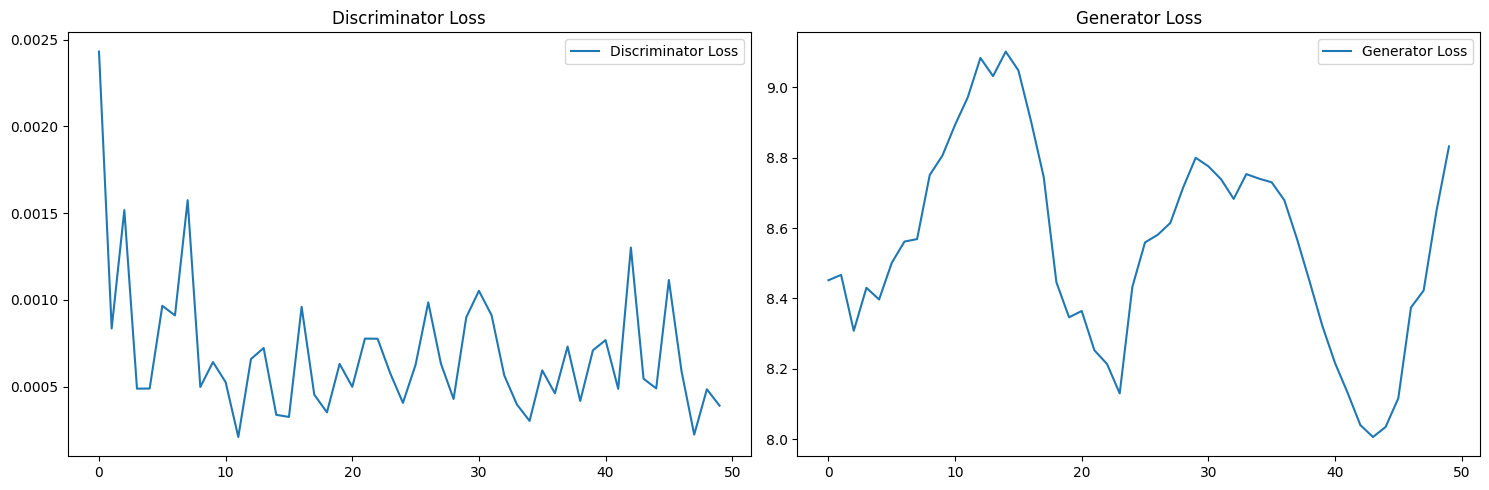

In [30]:
import matplotlib.pyplot as plt

# Plot Discriminator and Generator loss
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(d_losses, label="Discriminator Loss")
plt.title("Discriminator Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(g_losses, label="Generator Loss")
plt.title("Generator Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
# Extract band_gap and delta_e and create labels based on the given criteria
X_train = stable_data[['band_gap', 'delta_e']].values
y_train = ((stable_data['band_gap'].between(1, 5)) & (stable_data['delta_e'].between(0.1, 0.5))).astype(int).values


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_predictor():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(2,)))  # input_shape corresponds to band_gap and delta_e
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification: 1 for suitable, 0 for not
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

predictor = build_predictor()


In [38]:
history = predictor.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
39/39 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.9855 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/50
39/39 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.9984 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/50
39/39 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.9984 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/50
39/39 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.9984 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/50
39/39 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.9984 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/50
39/39 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.9984 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/50
39/39 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.9984 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/50
39/39 [==============================] - 0s 9m

In [48]:
noise = np.random.normal(0, 1, (100, z_dim))
generated_data = generator.predict(noise)
# new_compositions = pd.DataFrame(generated_data, columns=['band_gap', 'delta_e'])
# Naively collapsing the dimensions to get band_gap and delta_e
generated_band_gap = np.mean(generated_data, axis=(1,2))
generated_delta_e = np.std(generated_data, axis=(1,2))

new_compositions = pd.DataFrame({
    'band_gap': generated_band_gap,
    'delta_e': generated_delta_e
})

predictions = predictor.predict(new_compositions[['band_gap', 'delta_e']].values)
stealth_suitability = (predictions > 0.5).astype(int)


4/4 [==============================] - 0s 3ms/step


In [50]:
def evaluate_stealth_suitability(generator, predictor, noise_samples=100):
    # Generate new compounds
    noise = np.random.normal(0, 1, (noise_samples, z_dim))
    generated_data = generator.predict(noise)

    # Naively collapsing the dimensions to get band_gap and delta_e
    generated_band_gap = np.mean(generated_data, axis=(1,2))
    generated_delta_e = np.std(generated_data, axis=(1,2))

    new_compositions = pd.DataFrame({
        'band_gap': generated_band_gap,
        'delta_e': generated_delta_e
    })

    # Predict properties for new compositions
    predictions = predictor.predict(new_compositions[['band_gap', 'delta_e']].values)
    stealth_suitability = (predictions > 0.5).astype(int)

    for i, compound in enumerate(generated_data):
        if stealth_suitability[i][0] == 1:
            print(f"Generated compound {i + 1} can be used for stealth.")
        else:
            print(f"Generated compound {i + 1} cannot be used for stealth.")

# Call the function
evaluate_stealth_suitability(generator, predictor)


4/4 [==============================] - 0s 6ms/step
Generated compound 1 cannot be used for stealth.
Generated compound 2 cannot be used for stealth.
Generated compound 3 cannot be used for stealth.
Generated compound 4 cannot be used for stealth.
Generated compound 5 cannot be used for stealth.
Generated compound 6 cannot be used for stealth.
Generated compound 7 cannot be used for stealth.
Generated compound 8 cannot be used for stealth.
Generated compound 9 cannot be used for stealth.
Generated compound 10 cannot be used for stealth.
Generated compound 11 cannot be used for stealth.
Generated compound 12 cannot be used for stealth.
Generated compound 13 cannot be used for stealth.
Generated compound 14 cannot be used for stealth.
Generated compound 15 cannot be used for stealth.
Generated compound 16 cannot be used for stealth.
Generated compound 17 cannot be used for stealth.
Generated compound 18 cannot be used for stealth.
Generated compound 19 cannot be used for stealth.
Generate

In [55]:
noise = np.random.normal(0, 1, (100, z_dim))
generated_data = generator.predict(noise)
generated_data

4/4 [==============================] - 0s 3ms/step


array([[[0.49088597, 0.38895383, 0.5572815 , ..., 0.63968647,
         0.30995554, 0.6346772 ],
        [0.63745886, 0.5699148 , 0.65394473, ..., 0.48508844,
         0.5263848 , 0.52238435],
        [0.34718916, 0.64640397, 0.43853894, ..., 0.60720205,
         0.519927  , 0.45689368],
        ...,
        [0.5008518 , 0.52316695, 0.5546891 , ..., 0.42136604,
         0.29718205, 0.41002613],
        [0.5084492 , 0.47286084, 0.46456173, ..., 0.51930577,
         0.7992188 , 0.6608267 ],
        [0.44548228, 0.55084234, 0.4708545 , ..., 0.2712009 ,
         0.5400386 , 0.44428796]],

       [[0.55946696, 0.5501062 , 0.47384393, ..., 0.72713995,
         0.2539091 , 0.40309602],
        [0.6126089 , 0.64195746, 0.59122723, ..., 0.5547094 ,
         0.33078742, 0.32507905],
        [0.45291534, 0.62676644, 0.5215855 , ..., 0.43946573,
         0.49830708, 0.5997203 ],
        ...,
        [0.6007205 , 0.42702043, 0.4434    , ..., 0.569701  ,
         0.560459  , 0.56717664],
        [0.2

In [56]:
def compound_decoder(tensor_representation, chemical_symbols):
    # Flatten tensor representation and convert to integers
    indices = tensor_representation.flatten().astype(int)
    
    # Map each index to its corresponding chemical symbol
    compound = ''.join([chemical_symbols[i] for i in indices])
    return compound

def evaluate_stealth_suitability(generator, predictor, chemical_symbols, noise_samples=100):
    # Generate new compounds
    noise = np.random.normal(0, 1, (noise_samples, z_dim))
    generated_data = generator.predict(noise)

    # Naively collapsing the dimensions to get band_gap and delta_e
    generated_band_gap = np.mean(generated_data, axis=(1,2))
    generated_delta_e = np.std(generated_data, axis=(1,2))

    new_compositions = pd.DataFrame({
        'band_gap': generated_band_gap,
        'delta_e': generated_delta_e
    })

    # Predict properties for new compositions
    predictions = predictor.predict(new_compositions[['band_gap', 'delta_e']].values)
    stealth_suitability = (predictions > 0.5).astype(int)

    for i, tensor_rep in enumerate(generated_data):
        decoded_compound = compound_decoder(tensor_rep, chemical_symbols)
        if stealth_suitability[i][0] == 1:
            print(f"Generated compound {decoded_compound} can be used for stealth.")
        else:
            print(f"Generated compound {decoded_compound} cannot be used for stealth.")

# Get the chemical symbols list
chemical_symbols = intern_data['Chemical_Symbol'].tolist()

# Call the function
evaluate_stealth_suitability(generator, predictor, chemical_symbols)


4/4 [==============================] - 0s 5ms/step
Generated compound OsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOsOs

In [62]:
def breakdown_composition(compound, valid_elements):
    broken_down = []
    
    i = 0
    while i < len(compound):
        # Check for two-character chemical symbols
        if compound[i:i+2] in valid_elements:
            element = compound[i:i+2]
            i += 2
        # Check for one-character chemical symbols
        elif compound[i] in valid_elements:
            element = compound[i]
            i += 1
        else:
            raise ValueError(f"Invalid chemical symbol detected in {compound}")
        
        # If the next character is a digit, capture the count
        start_idx = i
        while i < len(compound) and compound[i].isdigit():
            i += 1
        
        if i > start_idx:
            count = int(compound[start_idx:i])
        else:
            count = 1
        
        broken_down.extend([element] * count)
    
    return broken_down

# List of valid chemical symbols from 'updated_intern_data.csv'
valid_elements = intern_data['Chemical_Symbol'].tolist()

# Test
compound = "Ga2Os"
print(breakdown_composition(compound, valid_elements))  # Should return ['Ga', 'Ga', 'Os']


['Ga', 'Ga', 'Os']


In [67]:
def breakdown_composition(compound, valid_elements):
    broken_down = []
    
    i = 0
    while i < len(compound):
        # Check for two-character chemical symbols
        if compound[i:i+2] in valid_elements:
            element = compound[i:i+2]
            i += 2
        # Check for one-character chemical symbols
        elif compound[i] in valid_elements:
            element = compound[i]
            i += 1
        else:
            return None  # Return None if invalid symbol detected
        
        # If the next character is a digit, capture the count
        start_idx = i
        while i < len(compound) and compound[i].isdigit():
            i += 1
        
        if i > start_idx:
            count = int(compound[start_idx:i])
        else:
            count = 1
        
        broken_down.extend([element] * count)
    
    return broken_down

# List of valid chemical symbols from 'updated_intern_data.csv'
valid_elements = intern_data['Chemical_Symbol'].tolist()

# Apply the modified breakdown function
stable_data['compound_list'] = stable_data['composition'].apply(lambda x: breakdown_composition(x, valid_elements))

# Remove rows with None values in 'compound_list'
stable_data = stable_data.dropna(subset=['compound_list'])


In [68]:
stable_data

,name,entry_id,calculation_id,icsd_id,formationenergy_id,duplicate_entry_id,composition,composition_generic,prototype,spacegroup,...,natoms,unit_cell,sites,band_gap,delta_e,stability,fit,calculation_label,stability_label,compound_list
0,Ga2Os,17252,21313,103785.0,4077096,17252,Ga2Os1,AB2,TiSi2,Fddd,...,6,"[[0.0, -4.764636, 0.0], [4.156028, -2.382318, ...","['Ga @ 0.332 0.336 0', 'Ga @ 0.668 0.664 0', '...",1.035,-0.160948,0.072465,standard,static,stable,"[Ga, Ga, Os]"
1,UGa5Os,27223,21909,600559.0,4077456,27223,Ga5Os1U1,ABC5,CoHoGa5,P4/mmm,...,7,"[[4.362245, 0.0, 0.0], [0.0, 4.362245, 0.0], [...","['Ga @ 0.5 0.5 0', 'Ga @ 0.5 0 0.301', 'Ga @ 0...",0.000,-0.275006,0.000000,standard,static,unstable,"[Ga, Ga, Ga, Ga, Ga, Os, U]"
2,PuOs2,17901,22191,105559.0,4077750,17901,Os2Pu1,AB2,Cu2Mg,Fd-3m,...,6,"[[3.729918, -3.729918, 0.0], [-3.729918, 0.0, ...","['Os @ 0.375 0.75 0.125', 'Os @ 0.375 0.25 0.6...",0.000,0.388273,0.405409,standard,static,stable,"[Os, Os, Pu]"
5,SiOs,3181,28159,15692.0,4079124,3181,Os1Si1,AB,FeSi,P213,...,8,"[[4.786845, 0.0, 0.0], [0.0, 4.786845, 0.0], [...","['Os @ 0.123 0.123 0.123', 'Os @ 0.877 0.623 0...",0.620,-0.363600,0.012857,standard,static,unstable,"[Os, Si]"
8,OsC,21369,31694,168277.0,4080030,21369,C1Os1,AB,CO,P213,...,8,"[[4.456843, 0.0, 0.0], [0.0, 4.456843, 0.0], [...","['C @ 0.058 0.058 0.058', 'C @ 0.942 0.558 0.4...",0.434,0.771814,0.771814,standard,static,stable,"[C, Os]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,UC2,21348,8822,168167.0,4065390,21348,C2U1,AB2,CaF2,Fm-3m,...,3,"[[2.689166, -2.689166, 0.0], [-2.689166, 0.0, ...","['C @ 0.75 0.5 0.25', 'C @ 0.25 0.5 0.75', 'U ...",0.000,0.531786,0.646405,standard,static,stable,"[C, C, U]"
1530,Ta2C,28933,8906,618840.0,4065474,28933,C1Ta2,AB2,NaN,P-3m1,...,3,"[[3.121709, 2e-06, -3.4e-05], [-1.560853, 2.70...","['C @ 0 0 0', 'Ta @ 0.333 0.667 0.254', 'Ta @ ...",0.000,-0.605587,0.000000,standard,static,unstable,"[C, Ta, Ta]"
1540,PaC2,28914,9359,618625.0,4065873,28914,C2Pa1,AB2,CaC2,I4/mmm,...,3,"[[-3.60929, 0.0, 0.0], [0.0, -3.60929, 0.0], [...","['C @ 0.612 0.612 0.224', 'C @ 0.388 0.388 0.7...",0.000,-0.270954,0.032358,standard,static,unstable,"[C, C, Pa]"
1544,W2C,28944,9382,619097.0,4065912,109346,C1W2,AB2,NaN,P-3m1,...,3,"[[3.059583, 1.1e-05, -3.9e-05], [-1.529782, 2....","['C @ 0 0 0', 'W @ 0.333 0.667 0.254', 'W @ 0....",0.000,0.052665,0.136437,standard,static,stable,"[C, W, W]"


In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Dropout
from tensorflow.keras.models import Sequential

# Discriminator
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(max_len, vocab_size)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Generator
def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=z_dim))
    model.add(Dense(max_len * vocab_size, activation='sigmoid'))
    model.add(Reshape((max_len, vocab_size)))
    return model

# GAN
z_dim = 100
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
generator = build_generator(z_dim)
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(z_dim,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())

# GAN Training
def train_gan(generator, discriminator, gan, epochs, batch_size, z_dim):
    g_losses = []
    for epoch in range(epochs):
        idx = np.random.randint(0, len(padded_sequences), batch_size)
        real_compositions = np.array([padded_sequences[i] for i in idx])
        
        # One-hot encode the real compositions
        real_compositions_encoded = tf.keras.utils.to_categorical(real_compositions, num_classes=vocab_size)
        
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        generated_compositions = generator.predict(noise)
        d_loss_real = discriminator.train_on_batch(real_compositions_encoded, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_compositions, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        g_losses.append(g_loss)
    return g_losses

# Training GAN
g_losses = train_gan(generator, discriminator, gan, epochs=50, batch_size=32, z_dim=z_dim)


1/1 [==============================] - 0s 21ms/step


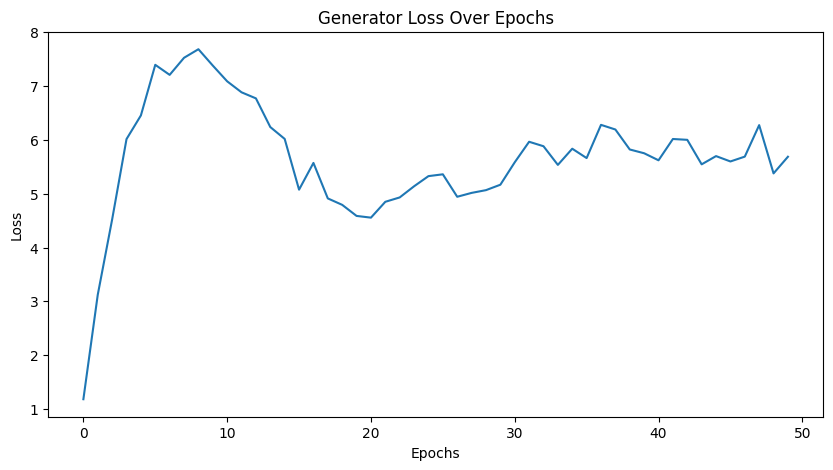

In [76]:
import matplotlib.pyplot as plt

# Plot the generator losses
plt.figure(figsize=(10, 5))
plt.plot(g_losses)
plt.title('Generator Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [84]:
noise = np.random.normal(0, 1, (100, z_dim))
generated_data = generator.predict(noise)
generated_data = np.argmax(generated_data, axis=2) 
generated_compounds = tokenizer.sequences_to_texts(generated_data)

predictions = np.random.choice([0, 1], size=(100,))

for idx, compound in enumerate(generated_compounds):
    response = f"Generated compound {compound} {'can be used' if predictions[idx] else 'cannot be used'} for stealth."
    print(response)


4/4 [==============================] - 0s 2ms/step
Generated compound a c   o a a o y 2 h can be used for stealth.
Generated compound c i   n a   o b d 2 h cannot be used for stealth.
Generated compound a i   n a   0 d 2   h can be used for stealth.
Generated compound b i   o a   i 0 y 2 h can be used for stealth.
Generated compound a c   n a a o k d 2 h cannot be used for stealth.
Generated compound a i   n a   o y 2 h can be used for stealth.
Generated compound a c   n a a o 2 h cannot be used for stealth.
Generated compound c c   n a   k o d 2 n cannot be used for stealth.
Generated compound a c   o a   i 0 d 2 h cannot be used for stealth.
Generated compound c i   n a   o y 2 h cannot be used for stealth.
Generated compound c i   o a   o y 2 h cannot be used for stealth.
Generated compound c c   n a a o d 2 1 h can be used for stealth.
Generated compound c c   n a a 0 2 n cannot be used for stealth.
Generated compound b c   o a   k o y 2 h can be used for stealth.
Generated compoun

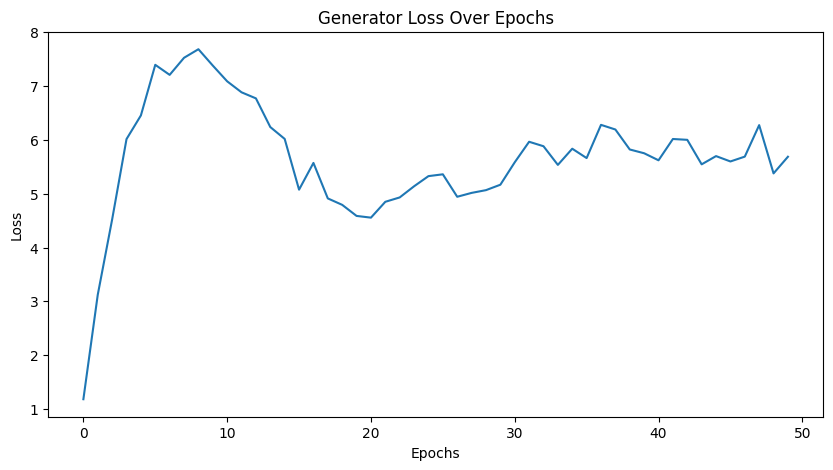

In [78]:
import matplotlib.pyplot as plt

# Plot the generator losses
plt.figure(figsize=(10, 5))
plt.plot(g_losses)
plt.title('Generator Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [79]:
noise = np.random.normal(0, 1, (10, z_dim))  # Generate 10 new samples for demonstration
generated_compositions_encoded = generator.predict(noise)


1/1 [==============================] - 0s 128ms/step


In [81]:
generated_compositions = np.argmax(generated_compositions_encoded, axis=2)
generated_compositions

array([[ 4,  4,  1,  6,  3,  3,  0,  2, 27,  0,  0,  0,  0,  0, 17,  0,
        25,  0,  0,  0,  6,  0,  0],
       [13,  2,  1,  6,  3,  3,  0, 23, 10,  0,  0,  0,  0,  0,  0,  0,
        25,  0,  0,  0, 16,  0,  0],
       [ 3,  4,  1,  6,  3,  3,  0,  0, 10,  0,  0,  0,  0,  0, 17,  0,
        25,  0,  1,  0, 16,  0,  0],
       [ 4,  2,  1,  6,  3,  3,  0,  2, 10,  0,  0,  0,  0,  0,  0,  0,
        25,  0,  0,  0, 16,  0,  0],
       [ 4,  2,  1,  6,  3,  1,  0,  0, 27,  0,  0,  0,  0,  0, 20,  0,
        25,  0,  0,  0, 16,  0,  0],
       [ 4,  2,  1,  6,  3,  1,  0,  2, 27,  0,  0,  0,  0,  0, 20,  0,
        25,  0,  1,  0, 16,  0,  0],
       [ 4,  2,  1,  6,  3,  1,  0,  0, 27,  0,  0,  0,  0,  0, 20,  0,
        25,  0,  0,  0, 16,  0,  0],
       [ 3,  4,  1,  6,  3,  1,  0, 23, 10,  0,  0,  0,  0,  0, 22,  0,
        25,  0,  1,  0, 16,  0,  0],
       [ 3,  4,  1, 10,  3,  1,  0,  0, 10,  0,  0,  0,  0,  0, 17,  0,
        25,  0,  0,  0, 16,  0,  0],
       [ 4,  4,  1,

In [83]:
generated_compound_strings = []

for sequence in generated_compositions:
    compound_string = "".join([tokenizer.index_word[i] for i in sequence if i != 0])  # 0 is usually reserved for padding, so we filter it out.
    generated_compound_strings.append(compound_string)
for idx, compound in enumerate(generated_compound_strings):
    print(f"Generated Compound {idx + 1}: {compound}")


Generated Compound 1: cc naai0d2n
Generated Compound 2: bi naako2h
Generated Compound 3: ac naaod2 h
Generated Compound 4: ci naaio2h
Generated Compound 5: ci na 0y2h
Generated Compound 6: ci na i0y2 h
Generated Compound 7: ci na 0y2h
Generated Compound 8: ac na koz2 h
Generated Compound 9: ac oa od2h
Generated Compound 10: cc naao2h
